In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
import json

In [4]:
def plot_top_words(model, feature_names, n_top_words=10, title="Title"):
    fig, axes = plt.subplots(3, 4, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1: -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [5]:
stop_words = None
with open("stopwords.txt", "r") as stop_file:
    stop_words = set(stop_file.read().splitlines())

In [7]:
tweets = []
classes = []
candidates = []
lemm_tweets = None

with open("data/lemm_tweets.json", "r") as in_file:
    lemm_tweets = json.load(in_file)

for candidate, candidate_tweets in lemm_tweets.items():
    candidates.append(candidate)
    for tweet in candidate_tweets:
        non_stop_words = []

        for word in tweet.split():
            if word not in stop_words:
                non_stop_words.append(word)

        if len(non_stop_words) > 0:
            tweets.append(" ".join(non_stop_words))
            classes.append(candidate)

In [8]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(tweets)
feature_names = vectorizer.get_feature_names_out()

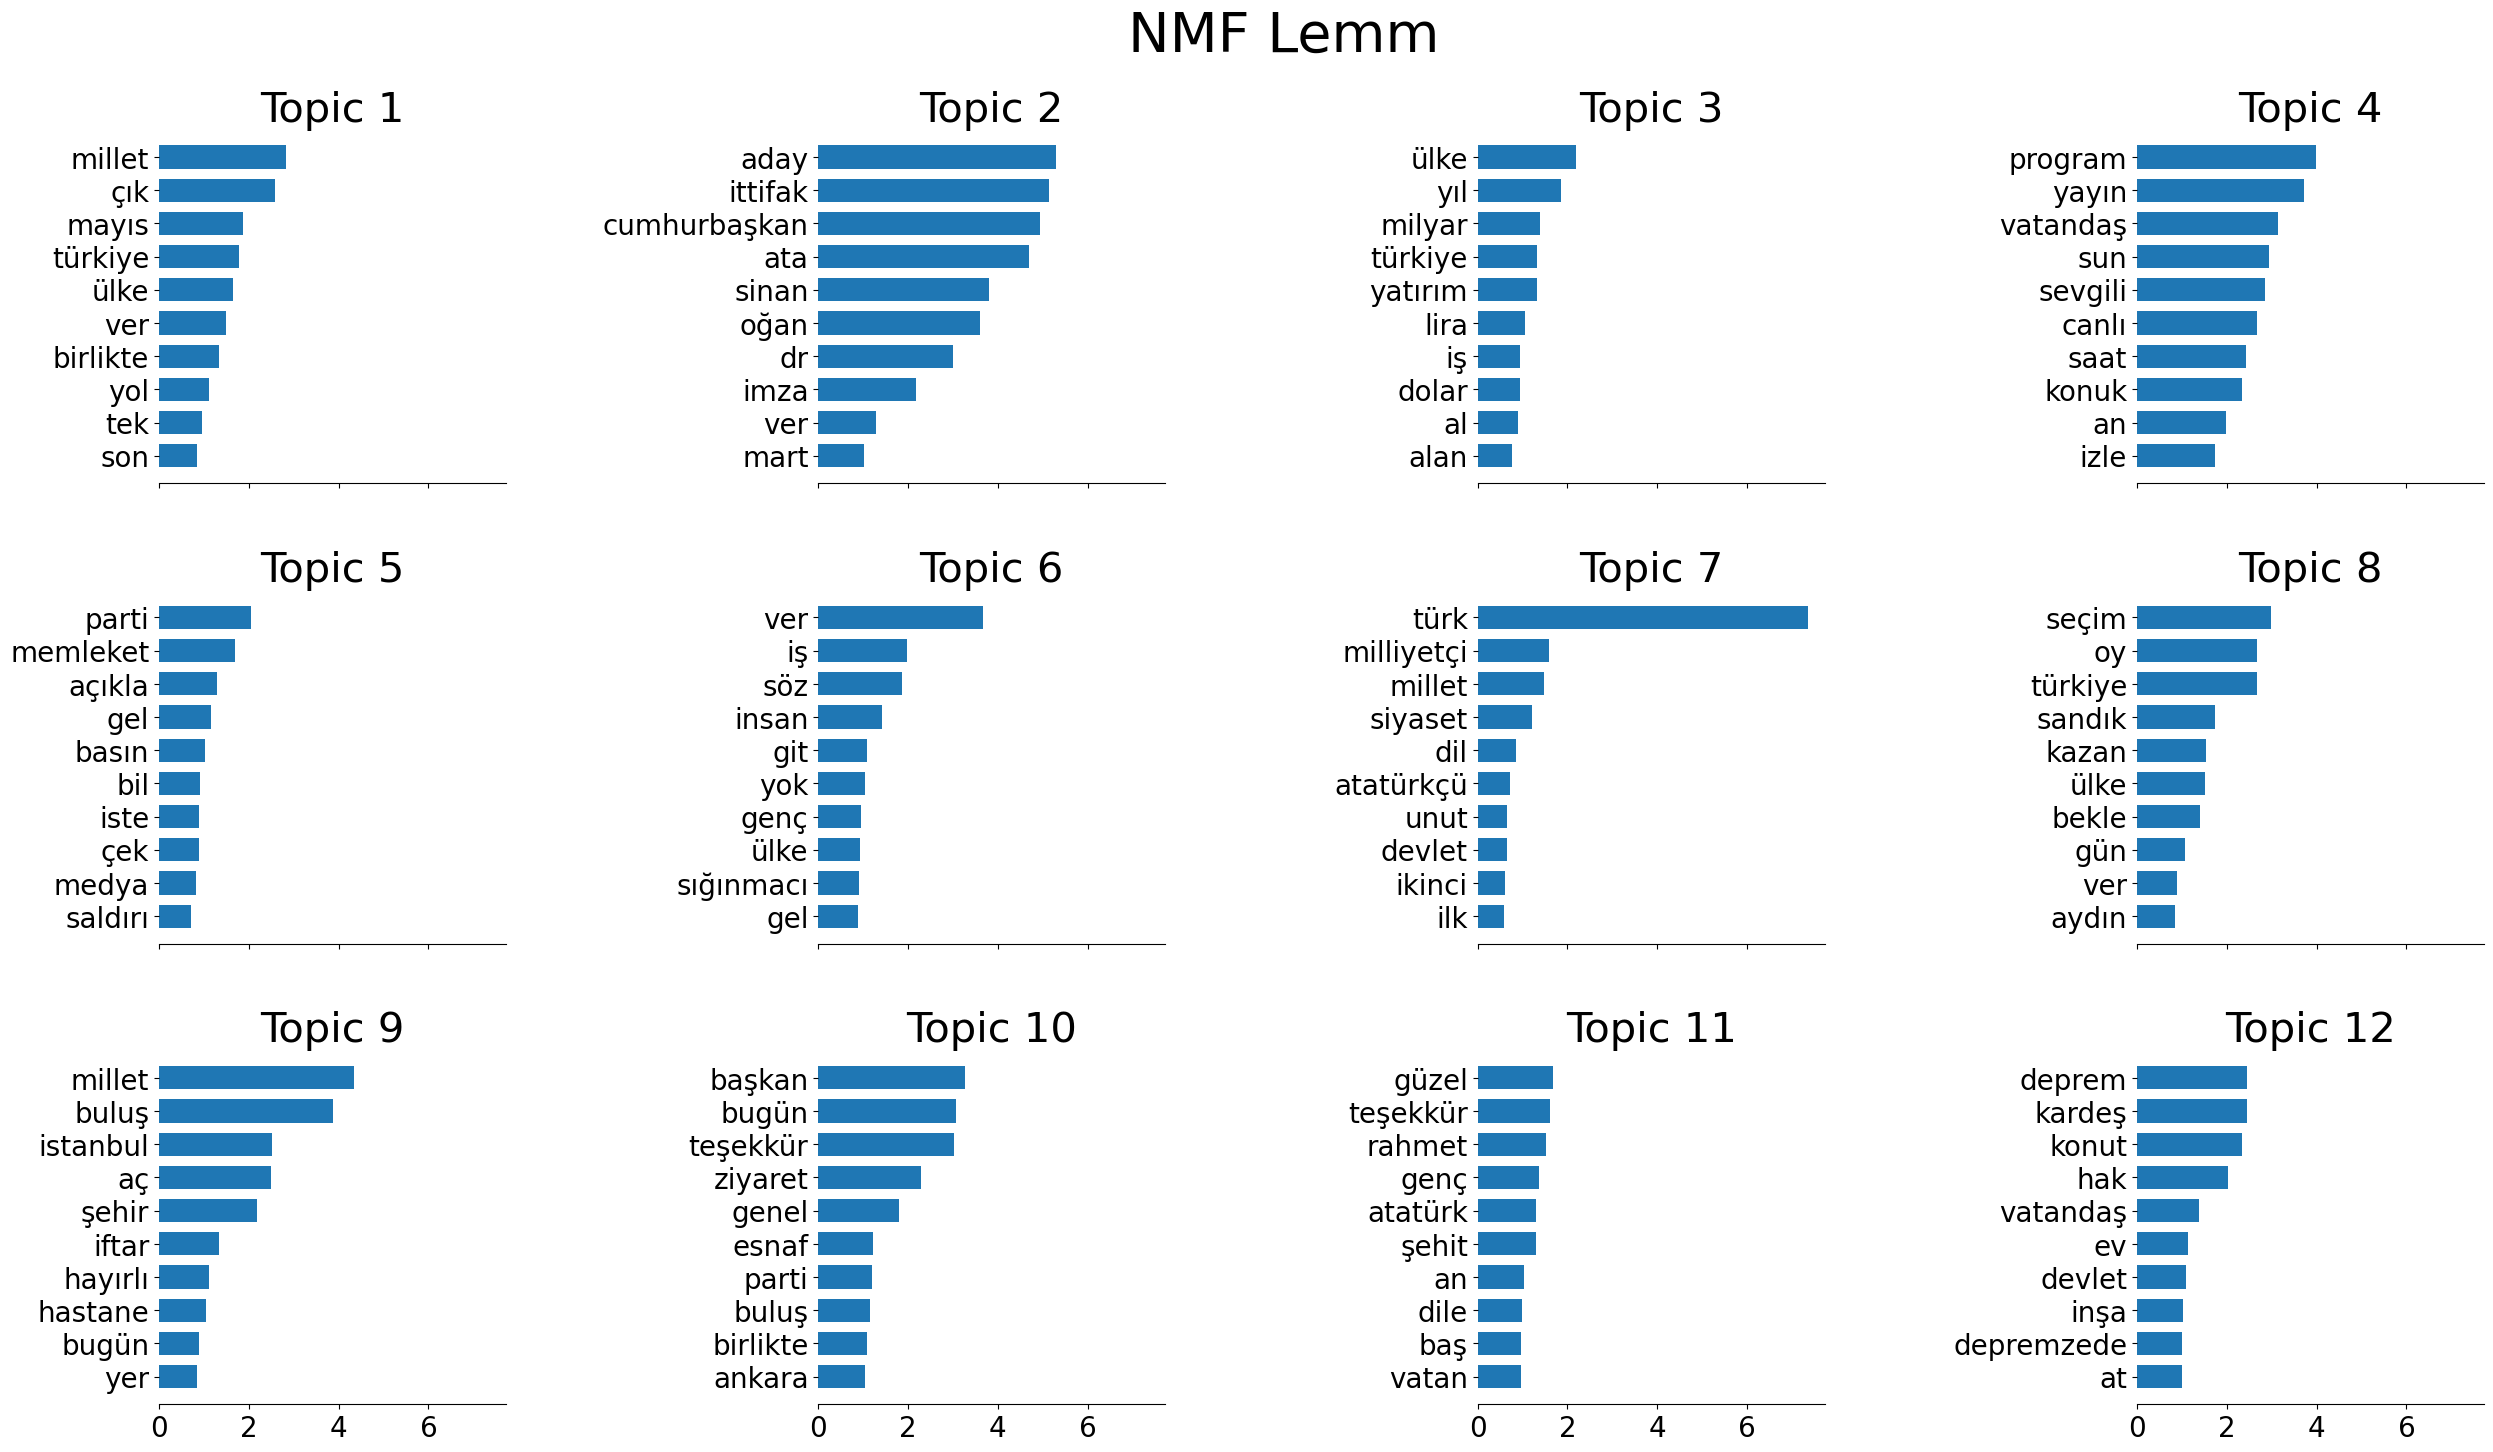

In [9]:
nmf = NMF(n_components=12, beta_loss="kullback-leibler",
          solver="mu", random_state=42)
nmf.fit(X)
plot_top_words(nmf, feature_names, title="NMF Lemm")

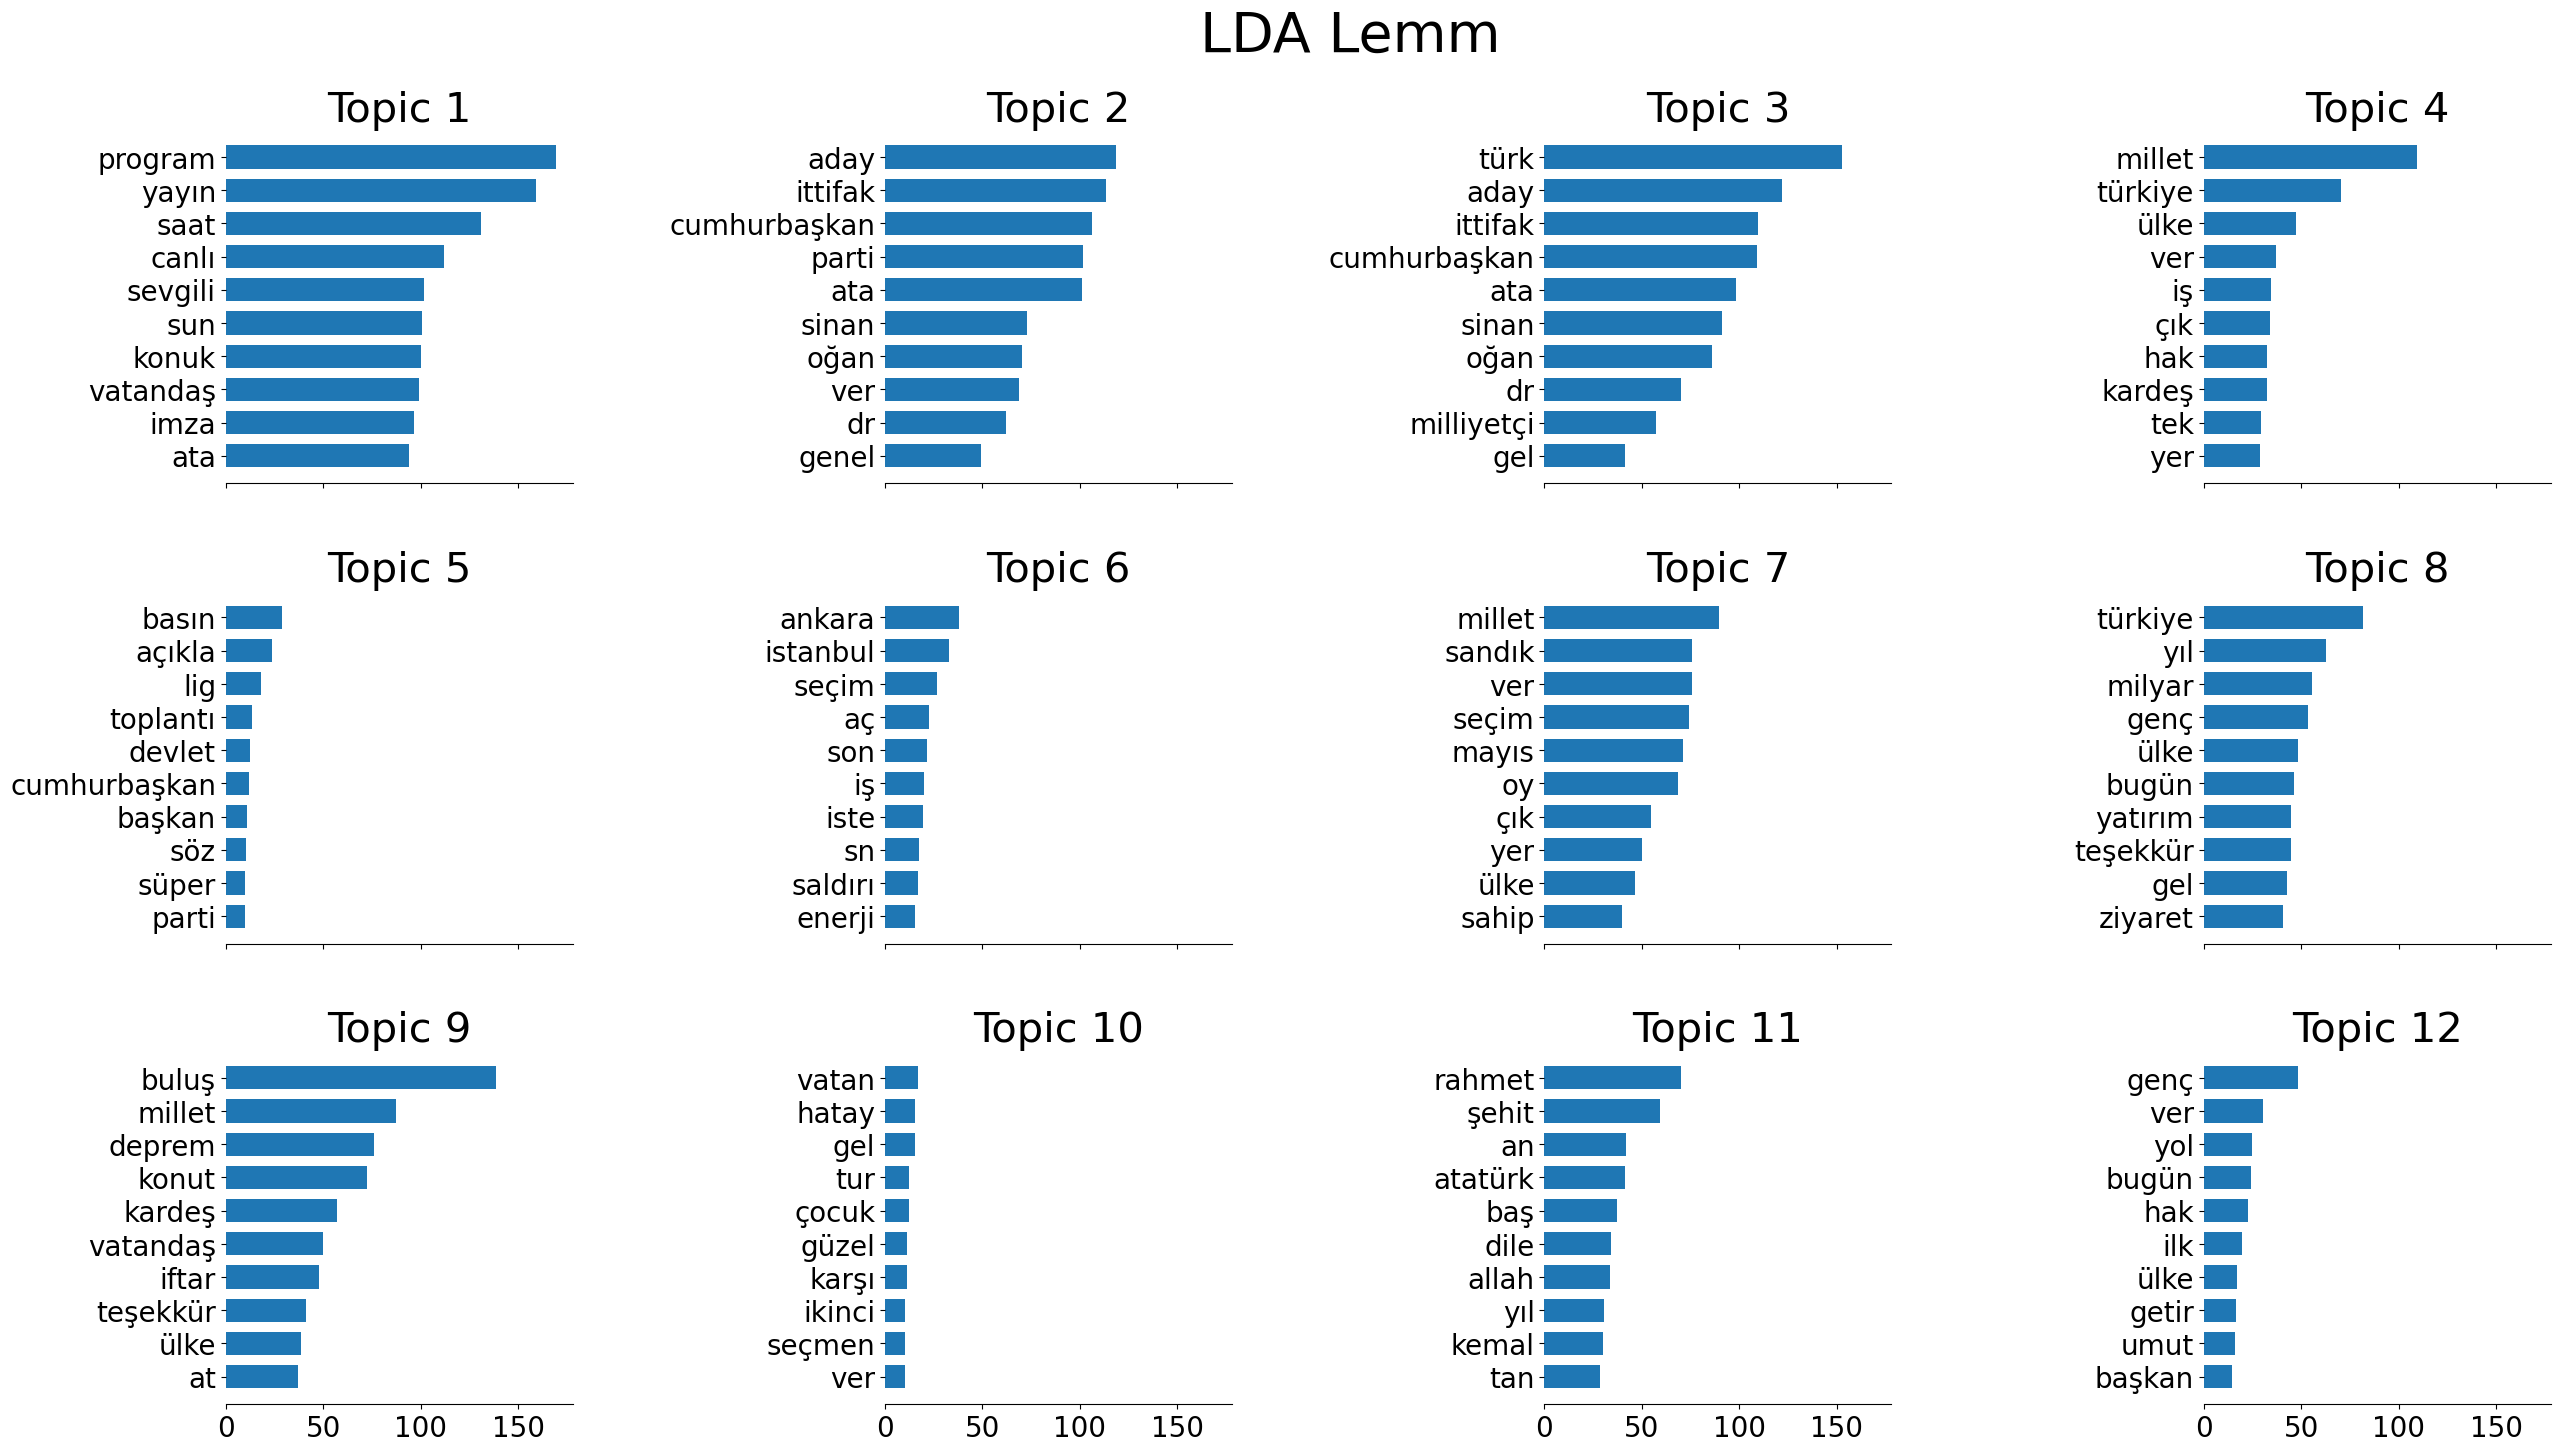

In [10]:
lda = LatentDirichletAllocation(n_components=12, random_state=42)
lda.fit(X)
plot_top_words(lda, feature_names, title="LDA Lemm")